![Numpy Logo](Numpy_logo.jpg)

## Programming for Data Analysis 2020 - 52465
### Killian Foley
#### November 2020

# Assignment exploring numpy.random package in python

## Problem statement
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

## Numpy explained
NumPy (Numerical Python) is an open source Python library considered as the fundamental package for scientific computing in Python. It is the universal standard Python library for working with numerical data in almost every field of science and engineering. The NumPy API is used extensively in many other Python data science packages such as Pandas, SciPy, Matplotlib, scikit-learn, scikit-image and many other data science and scientific Python packages. The NumPy package contains multidimensional array and matrix data structures, and enables fast operations on arrays, including mathematical, logical, shape manipulation, sorting, basic linear algebra, statistical operations and random simulation (and much more). [1,2]

## 1. Numpy.random explained
#### What is a random number?
"*Random - made, done, or happening without method or conscious decision*" (definition - Oxford English Dictionary). A Random number does NOT mean it has to be a different number every time. Random means something that can not be predicted logically. [3]  
  
The ability to generate random numbers is an important part of the configuration and evaluation of many numerical and machine learning algorithms. From shuffling datasets randomly or splitting data into random sub-sets, being able to generate random numbers (actually, repeatable pseudo-random numbers) is an essential part of data science. [2]
#### How it works  
Numpy’s random number function produces pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions:
  
* **BitGenerators:** Objects that generate random numbers. These are typically unsigned integer words filled with sequences of either 32 or 64 random bits.
  
* **Generators:** Objects that transform sequences of random bits from a BitGenerator into sequences of numbers that follow a specific probability distribution (such as uniform, Normal or Binomial) within a specified interval. [4]
  
For the purpose of this investigation the Numpy random module can be split into four parts
* Simple Random Data
* Permutations
* Distributions
* Random Generator
***
##### Code

In [1]:
# First import numpy package. 
import numpy as np
# Next check the version is V 1.19
np.version.version

'1.19.2'

In [2]:
# Next we import matplotlib and seaborn for data visualtion and charts
import matplotlib.pyplot as plt 
import seaborn as sns
# call "magic function" for matplotlib to show charts in jupyter notebook
# Ref - https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline

## 2.1 "Simple random data" functions explained
Referencing the Numpy random documentation [5] the following are the available **simple random data** functions

| Numpy Function | Description |
|:---------------|:------------|
| **integers**(low[, high, size, dtype, endpoint]) | Return random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive)|
| **random**([size, dtype, out]) | Return random floats in the half-open interval [0.0, 1.0]|
| **choice**(a[, size, replace, p, axis, shuffle]) | Generates a random sample from a given 1-D array|
| **bytes**(length) | Return random bytes |  
  
***

#### _Integers( )_ function
From the table above the function returns random integers from low (inclusive) to high (exclusive)

In [3]:
# start using the random number generator (rng) integers
rng = np.random.default_rng()
rng.integers(2, size=10)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1])

From consulting the documentation it is noted that the above function produces a 1-D array with 10 entries returning random numbers between 0 (inclusive) and 2 (exclusive). [6]

In [4]:
rng.integers(3,10, size=(2,4)) # integers between 3 (incl) and 10 (excl) size 2 rows and 4 columns

array([[5, 8, 5, 8],
       [6, 5, 9, 6]])

***
#### _Random( )_ function
From the description in the table above this function returns random floats in the half-open interval [0.0, 1.0]. [7]

In [5]:
# Use random function to generate a random number between 0 (incl) and 1 (excl)
rng = np.random.default_rng()
rng.random()

0.9969305896984647

In [6]:
# Create a 3 x 2 array of random floating point numbers
rng = np.random.default_rng()
rng.random((3,2)) # note double brackets required

array([[0.66693442, 0.00723548],
       [0.18157589, 0.52793916],
       [0.26387566, 0.98093873]])

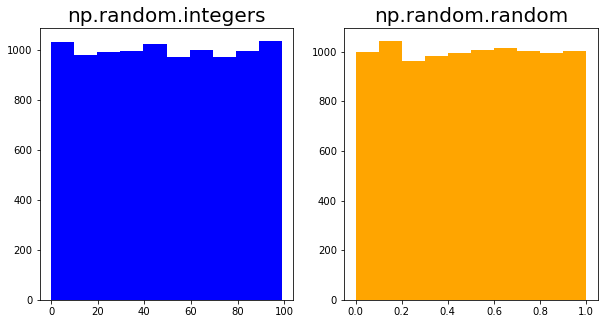

In [7]:
#Distribution for 10000 random numbers generated by the integers and random functions in NumPy’s random moduleb

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("np.random.integers", fontsize=20)
__randint__ = rng.integers(100, size=10000)
plt.hist(__randint__, color="blue")

plt.subplot(1, 2, 2)
plt.title("np.random.random", fontsize=20)
__random__ = rng.random(10000)
plt.hist(__random__, color="orange")

plt.show()


We can see from the above histograms that both the np.random.integers, and np.random.random functions are uniform distributions

***
#### _Choice( )_ function
Generates a random sample from a given 1-D array  
  
Parameters:  
  
a: {array_like, int}
   If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated from np.arange(a).

size : Output shape {int, tuple[int]}, optional

replace : bool, optional - Whether the sample is with or without replacement

p : 1-D array_like, optional - the probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.

axis : int, optional The axis along which the selection is performed. The default, 0, selects by row.

shuffle : bool, optional - whether the sample is shuffled when sampling without replacement. Default is True, False provides a speedup. [8]

In [8]:
rng = np.random.default_rng()
# Generate a uniform random sample from np.arange(6) of size 6
rng.choice(6,6)

array([2, 5, 5, 4, 2, 1])

In [9]:
# Generate a non-uniform random sample from np.arange(5) of size 10 without replacement (repetition):

rng.choice(5, 5, replace=False, p=[0.1, 0.2, 0.2, 0.3, 0.2])

array([0, 2, 1, 3, 4])

***
The function can also be used with any array not just integers. e.g.

In [10]:
counties = ['Wicklow', 'Dublin', 'Cork', 'Galway', 'Limerick']
rng.choice(counties, 5, replace=True)

array(['Wicklow', 'Cork', 'Dublin', 'Cork', 'Dublin'], dtype='<U8')

***
#### _bytes( )_ function
Generates random bytes
Parameters: 
length : int - Number of random bytes. [9]

In [11]:
rng.bytes(12)

b'\x9c4\x0b\x91\xc7\xf6[\xc0h\x1a\xb3\x92'

***

## 2.2 "Permutations" functions explained
Permutation means changing the arrangement, especially the linear order, of array of items in Numpy.
  
| Numpy Function | Description |  
|:---------------|:------------|  
| **shuffle**(x[, axis]) | Modify a sequence in-place by shuffling its contents. |  
| **permutation**(x[, axis]) | Randomly permute a sequence, or return a permuted range. |  

***
**numpy.random.shuffle(x)** - *Modify a sequence in-place by shuffling its contents.* [10]

In [12]:
# create a 1-D array
rng = np.random.default_rng()
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# pass arr into shuffle function
rng.shuffle(arr)
arr

array([0, 2, 1, 8, 5, 7, 6, 4, 9, 3])

As we can see above the shuffle function has modified the sequence of numbers in the array and overwritten "arr"
***
shuffle( ) has an optional axis parameter which the input is shuffled on. Default is 0. It is only supported on ndarray objects. Let's explore

In [14]:
# create a 2d array
arr2d = np.arange(9).reshape((3, 3))
arr2d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [15]:
# shuffle arr2d with axis = 0
rng.shuffle(arr2d, axis=0)
arr2d

array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

above we can see with axis=0, only the rows were interchanged.

In [16]:
# Shuffle again with axis = 1
rng.shuffle(arr2d, axis=1)
arr2d

array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

above we can see with axis=1 the columns were interchanged.
***
**numpy.random.permutation(x)** - *Randomly permute a sequence, or return a permuted range.* 
If x is an integer, the function will randomly permute np.arange(x). If x is an array, numpy makes a copy and shuffles the elements randomly. [11]

In [17]:
rng.permutation(10)

array([5, 7, 1, 4, 2, 6, 8, 3, 0, 9])

***
We can also input an array

In [18]:
rng.permutation([1, 3, 5, 7, 10, 12])

array([ 5,  1,  7, 10,  3, 12])

***
We can demonstrate with an array of string values

In [19]:
rng.permutation(["Wicklow", "Dublin", "Galway", "Limerick", "Tipperary"])

array(['Limerick', 'Dublin', 'Galway', 'Tipperary', 'Wicklow'],
      dtype='<U9')

***
np.random.permutation also accepts an optional axis paramter

In [20]:
# Create a 2d arrray shuffle with default axis=0
arr = np.arange(9).reshape((3, 3))
rng.permutation(arr)

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

In [21]:
# shuffle with axis=1
rng.permutation(arr, axis=1)

array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])

***
## 3. Distributions - functions
Probability distributions are foundational to the field of statistics. A probability distribution is the mathematical function that produces the probability or likelihood, of different possible outcomes of any experiment occurring.[12] Being able to identify which probability distribution function fits your data is an important part of data analysis. Probability plots can be an effective way of identifying whether your data follows a particular probability distribution. [13] As part of this exercise I will explore five of the 35 Numpy distributions available.
* dirichlet
* gamma
* geometric
* pareto
* vonmises
***
### 3.1 Dirichlet distribution
**np.random.generator.dirichlet**(_alpha, size=none_)<br />
alpha : sequence of floats, length k  
size : int or tuple of ints, optional. Default = none, in which case vector length k is returned.  
  
The Dirichlet distribution is a family of continuous multivariate distributions with parameters on a vector x that fulfil the conditions  
  
$x_i>0$ and $\sum_{i=1}^k x_i = 1$  
  
The probability density function $p$ of a Dirichlet-distributed random vector $X$ is proportional to  
$$p(x) \propto \prod_{i=1}^{k}{x^{\alpha_i-1}_i}$$  
  
where $\alpha$ is a vector containing the positive concentration parameters.  
The method uses the following property for computation: let $Y$ be a random vector which has components that follow a standard gamma distribution, then $X = \frac{1}{\sum_{i=1}^k{Y_i}} Y$ is Dirichlet-distributed. [14]
  
Wikidpedia defines the Dirichlet distribution as "a multivariate generalization of the beta distribution" and notes that Dirichlet distributions are commonly used as prior distributions in Bayesian statistics. [15]
  
An example use of the Dirichlet distribution is if one wanted to cut strings each of initial length 1.0 into K pieces with different lengths. Each piece has a designated average length, but some variation is permitted in the relative sizes of the pieces. The $α/α_{0}$ values specify the **mean lengths** of the cut pieces of string resulting from the distribution. The variance around this mean varies inversely with $α_{0}$.


In [22]:
# create dataset
__str__ = np.random.default_rng().dirichlet((10, 5, 3), 20).transpose()
__str__

array([[0.44359582, 0.50270964, 0.57475523, 0.54366112, 0.62574617,
        0.3122349 , 0.50486905, 0.43324166, 0.77703832, 0.49390419,
        0.58224681, 0.53848661, 0.70841503, 0.56776571, 0.45744326,
        0.56865974, 0.79194061, 0.65174313, 0.50241018, 0.48615506],
       [0.31742164, 0.45387356, 0.1912665 , 0.14325403, 0.22444358,
        0.29611825, 0.45354051, 0.44435438, 0.12973686, 0.29454157,
        0.27163479, 0.2804533 , 0.11709315, 0.29402943, 0.43279294,
        0.27553498, 0.19643723, 0.20603392, 0.35455473, 0.32425109],
       [0.23898254, 0.0434168 , 0.23397827, 0.31308486, 0.14981025,
        0.39164685, 0.04159044, 0.12240396, 0.09322482, 0.21155424,
        0.1461184 , 0.18106008, 0.17449181, 0.13820486, 0.10976381,
        0.15580527, 0.01162216, 0.14222295, 0.14303509, 0.18959385]])

Text(0.5, 1.0, 'Lengths of Strings')

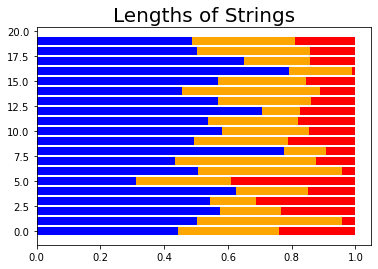

In [23]:
# plot the dataset
plt.barh(range(20), __str__[0], color="blue")
plt.barh(range(20), __str__[1], left=__str__[0], color="orange")
plt.barh(range(20), __str__[2], left=__str__[0]+__str__[1], color="red")
plt.title("Lengths of Strings", fontsize=20)

***
### 3.2 Gamma Distribution
**np.random.generator.gamma**(*shape, scale=1.0, size=None*)<br />
shape : float or array_like of floats. Must be > 0.  
scale : float or array_like of floats, optional. Default = 1. Must be > 0.  
size : int or tuple of ints, optional
  
The probability density for the Gamma distribution is  
$$p(x) = x^{k-1}\frac{e^{-x/\theta}}{\theta^k\Gamma(k)}$$  
where $k$ is the shape and $\theta$ the scale, and $\Gamma$ is the Gamma function. [17]  
  
The gamma distribution is often used to model the accumulated rainfall in a resevoir.

In [24]:
# create dataset from the gamma distribution
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.default_rng().gamma(shape, scale, 1000)

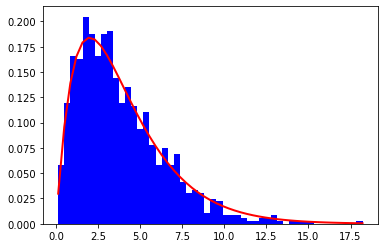

In [25]:
# plot a histogram of data along with probability density function
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html#scipy.stats.gamma
import scipy.special as sps  
count, bins, ignored = plt.hist(s, 50, density=True, color="blue")
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='r')  
plt.show()

***
### 3.3 Geometric Distribution
**np.random.generator.geometric**(*p, size=None*)<br />
p : Float or array_like of floats. The probability of success of an individual trial.  
size : int or tuple of ints, optional.  
  

A Bernoulli trial (or binomial trial) is a random experiment with two possible outcomes "success" and "failure". The probability of success is the same every time the experiment is conducted. An example of this would flipping a coin or rolling a dice with 6 being a success and all other numbers being failure.  
  
The probability mass function of the geometric distribution is expressed as follows[17]  
  
$$f(k) = (1 - p)^{k - 1} p$$

In [26]:
# Draw 10000 values from the geometric distribution, probability of success = 1 in 4 or 0.25
z = np.random.default_rng().geometric(p=0.25, size=10000)

In [27]:
# How many trials succeeded after a single run?
(z == 1).sum() / 10000

0.256

***
### 3.4 Pareto Distribution
**np.random.generator.pareto**(*a, size=None*)<br />

a : float or array_like of floats - Shape of the distribution. Must be > 0.  
size : int or tuple of ints, optional

Named after Vilfredo Pareto, who originally applied this distribution to describe the allocation of wealth in society. Sometimes referred to as the 80/20 rule it fits the trend that a small portion of society holds are large portion of wealth. It transpires that the Pareto function that 80-20 distribution fits many natural phenomena. [18] 
  
The probability density for the Pareto distribution is [19]
  
$$p(x) = \frac{am^a}{x^{a+1}}$$  
  
where $a$ is the shape and $m$ the scale.

In [28]:
# create dataset from the distribution
a, m = 3., 2.  # shape and mode
p = (np.random.default_rng().pareto(a, 1000) + 1) * m

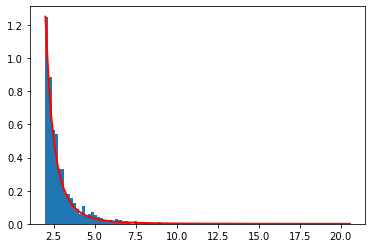

In [29]:
# Display histogram of samples with pdf displayed
count, bins, _ = plt.hist(p, 100, density=True)
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')
plt.show()

***
### 3.5 Vonmises Distribution
**np.random.generator.vonmises**(*mu, kappa, size=None*)<br />

mu : float or array_like of floats. Mode - number which distribution is centred  

kappa : float or array_like of floats. Dispersion of the distribution, must be >=0.  

size : int or tuple of ints, optional. Default=0  
  
The probability density function for the von Mises distribution is described as [20]  
  
$$p(x) = \frac{e^{\kappa cos(x-\mu)}}{2\pi I_0(\kappa)}$$  
where $\mu$ is the mode and $\kappa$ the dispersion, and $I_0(\kappa)$ is the modified Bessel function of order 0. 
  
The von Mises distribution is a continuous probability distribution on the unit circle. It can be thought of as the circular analogue of the normal distribution. [21]  

In [30]:
# create a dataset from the von mises distribution
mu, kappa = 0.0, 4.0 # mean and dispersion
v = np.random.default_rng().vonmises(mu, kappa, 1000)

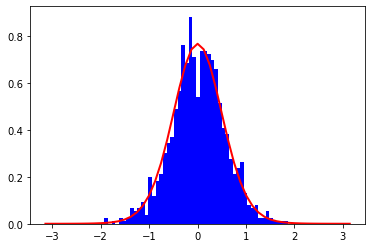

In [31]:
# Plot the histogram of the dataset and display the pdf
from scipy.special import i0  
plt.hist(v, 50, density=True, color="blue")
x = np.linspace(-np.pi, np.pi, num=51)
y = np.exp(kappa*np.cos(x-mu))/(2*np.pi*i0(kappa))  
plt.plot(x, y, linewidth=2, color='r')  
plt.show()

***
## 4. Seeds
The method numpy random used to generate pseudo random number has changed from the current version 1.19 to previous version. v1.19 uses a "generator" with bits provided by Permuted Congruential Generator 64 bit, or PCG64, whereas previous versions had a generator now called RandomState which used the Mersenne Twister (MT19937) method of providing bits. According to the NumPy official documentation PCG64 *"has better statistical properties"* than MT19937. [22] <br /> 
PCG-64 is a 128-bit implementation of O’Neill’s permutation congruential generator. [23] PCG has several advantages over MT including much more difficult to predict; multiple streams; far superior speed performance; uses much less space, and the code is much less complex than Mersenne Twister. [24]  
As per the previous versions it is possible to set the Generator (Seed) thus making the random number generator repeatable. 

In [32]:
# set the generator
from numpy.random import default_rng
rg = default_rng(12345)
# create an array of 10 integers between 5 and 20 (exclusive)
rg.integers(5,20, size=10)

array([15,  8, 16,  9,  8, 16, 14, 15, 19, 10])

In [33]:
# Reinstate the default generator to create an array with the same parameters as before
rng = np.random.default_rng()
rg.integers(5,20, size=10)

array([17,  9, 13, 13,  8,  7,  8, 15, 14, 19])

a different array is created from before
***
Next show that the array is repeatable

In [34]:
# set the generator as before
rg = default_rng(12345)
rg.integers(5,20, size=10)

array([15,  8, 16,  9,  8, 16, 14, 15, 19, 10])

## 5. Conclusion

In this notebook I explored many elements of the numpy.random routine in Python. NumPy is an extremly powerful pacakge widely used in the field of data analytics and data science most notable it is extremely useful for performing many mathematical operations on array and matrix data structures. This assignment helped to develop my understanding random number generation and why it is important and probability distributions including plotting and visualisation techniques. 

### References
[1] What is Numpy; https://numpy.org/doc/stable/user/whatisnumpy.html#whatisnumpy  
[2] NumPy: the absolute basics for beginners; https://numpy.org/doc/stable/user/absolute_beginners.html#generating-random-numbers  
[3] W3schools.com; https://www.w3schools.com/python/numpy_random.asp  
[4] random sampling (numpy.random); https://numpy.org/doc/stable/reference/random/index.html  
[5] Numpy Random Generator; https://numpy.org/doc/stable/reference/random/generator.html  
[6] np.random.integers; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html  
[7] np.random.random; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html  
[8] np.random.choice; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html  
[9] np.random.bytes; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html  
[10] np.random.shuffle; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html  
[11] np.random.permutation; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html  
[12] Probability distribution; https://en.wikipedia.org/wiki/Probability_distribution  
[13] How to Identify the Distribution of Your Data; https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data  
[14] np.random.Dirichlet; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.dirichlet.html  
[15] Dirichlet distribution - Wiki; https://en.wikipedia.org/wiki/Dirichlet_distribution  
[16] np.random.Gamma; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html  
[17] np.random.Geometric; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.geometric.html<br />
[18] Pareto distribution - Wiki; https://en.wikipedia.org/wiki/Pareto_distribution  
[19] np.random.Pareto; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html<br /> [20] np.random.vonMises; https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.vonmises.html<br />
[21] von Mises Distribution - Wiki; https://en.wikipedia.org/wiki/Von_Mises_distribution<br />
[22] Random sampling (numpy.random); https://numpy.org/doc/stable/reference/random/index.html<br />
[23] Permuted Congruential Generator (64-bit, PCG64); https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html <br />
[24] PCG, A Family of Better Random Number Generators; https://www.pcg-random.org/ <br />